In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [197]:

original = r"..\data\raw\Hotel_Reservations.csv"
df = pd.read_csv(original)
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [199]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [200]:
features = [
    'no_of_adults',
    'no_of_children',
    'no_of_weekend_nights',
    'no_of_week_nights',
    'type_of_meal_plan',
    'required_car_parking_space', 
    'room_type_reserved',
    'lead_time',
    'arrival_month',
    'market_segment_type',
    'no_of_special_requests'
]

target = 'avg_price_per_room'

#### Análisis de Variables Categóricas

In [201]:
# Hacemos un value_counts de las variables categoricas
categorical_cols = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']
for col in categorical_cols:
    print(f"--- {col} ---")
    print(df[col].value_counts())

--- type_of_meal_plan ---
type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64
--- room_type_reserved ---
room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64
--- market_segment_type ---
market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64
--- booking_status ---
booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64


#### Representación gráfica de distribucion y relación de Variables

C:\Users\JUAN\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


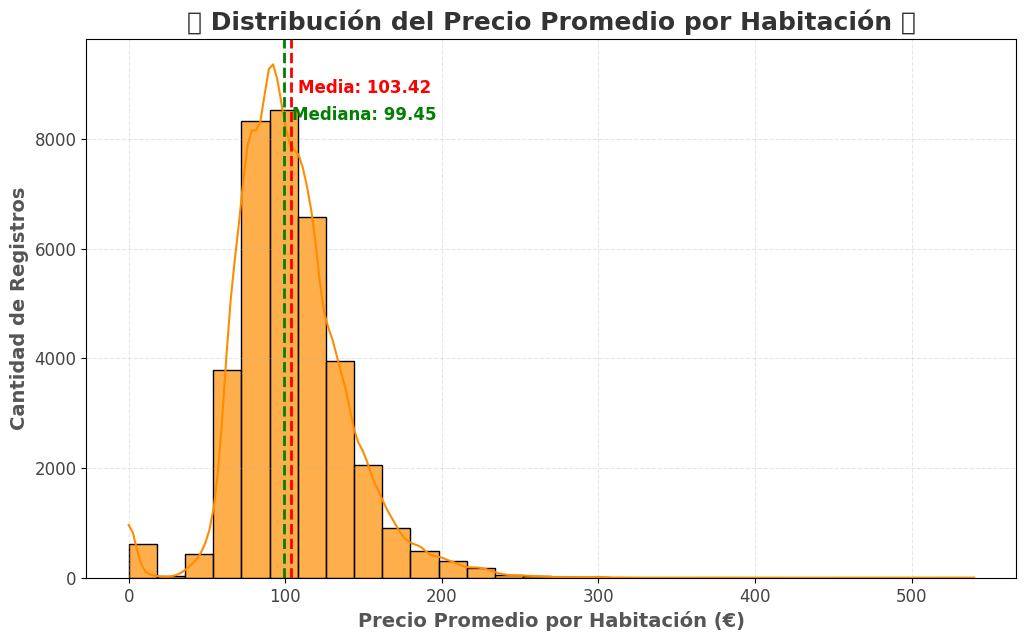

In [202]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(12, 7))

# Histograma con KDE refinado
sns.histplot(df['avg_price_per_room'], bins=30, kde=True, color="darkorange", alpha=0.7)

# Calcular media y mediana
media = np.mean(df['avg_price_per_room'])
mediana = np.median(df['avg_price_per_room'])

# Agregar líneas de media y mediana con etiquetas
plt.axvline(media, color='red', linestyle='dashed', linewidth=2)
plt.text(media + 5, plt.ylim()[1] * 0.9, f'Media: {media:.2f}', color='red', fontsize=12, fontweight='bold')

plt.axvline(mediana, color='green', linestyle='dashed', linewidth=2)
plt.text(mediana + 5, plt.ylim()[1] * 0.85, f'Mediana: {mediana:.2f}', color='green', fontsize=12, fontweight='bold')

# Mejorar títulos y etiquetas
plt.title('✨ Distribución del Precio Promedio por Habitación ✨', fontsize=18, fontweight='bold', color="#333")
plt.xlabel('Precio Promedio por Habitación (€)', fontsize=14, fontweight='bold', color="#555")
plt.ylabel('Cantidad de Registros', fontsize=14, fontweight='bold', color="#555")

# Refinamiento de líneas y fondo
plt.grid(alpha=0.3, linestyle="--")
plt.xticks(fontsize=12, color="#444")
plt.yticks(fontsize=12, color="#444")

# Mostrar gráfico optimizado
plt.show()

In [203]:
df['avg_price_per_room'].describe()


count    36275.000000
mean       103.423539
std         35.089424
min          0.000000
25%         80.300000
50%         99.450000
75%        120.000000
max        540.000000
Name: avg_price_per_room, dtype: float64

"avg_price_per_room es el precio promedio por habitación"

🔹 count (36275) → Sobre 36,275 habitaciones registradas

🔹 mean (103.42) → El precio promedio es de $103.42.

🔹 std (35.08) → Los precios tienden a variar aproximadamente ± $35 alrededor del promedio.

🔹 min (0.00) → Precio mínimo encontrado. Puede indicar datos erróneos o promociones especiales de habitaciones gratuitas.

🔹 25% (80.30) → Primer cuartil (Q1). El 25% de las habitaciones tienen un precio igual o menor a 80.30.

🔹 50% (99.45) → Mediana (Q2). El 50% de las habitaciones tienen un precio menor o igual a 99.45. La mediana es una mejor representación del "precio típico" cuando hay valores extremos.

🔹 75% (120.00) → Tercer cuartil (Q3). El 75% de las habitaciones tienen un precio de hasta 120.00.

🔹 max (540.00) → Algunas habitaciones tienen tarifas mucho más altas, lo que puede deberse a suites especiales.




C:\Users\JUAN\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


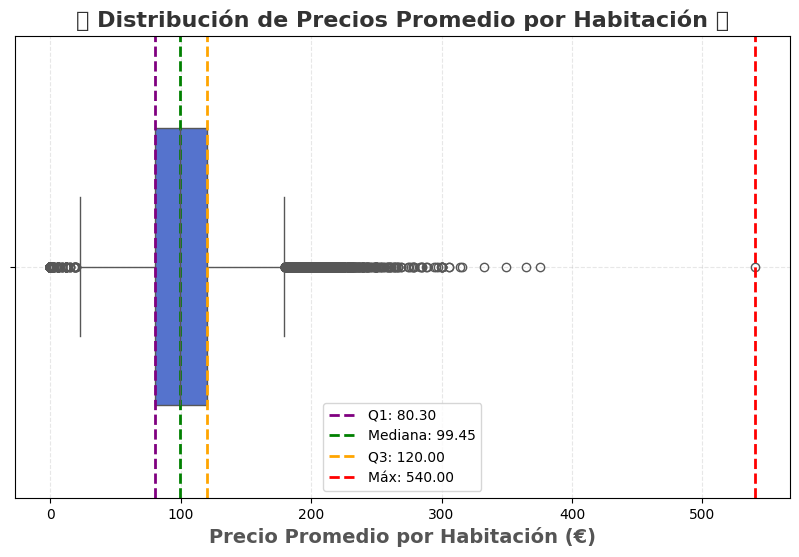

In [204]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Crear boxplot mejorado
sns.boxplot(x=df["avg_price_per_room"], color="royalblue", width=0.6)

# Mejorar etiquetas y diseño
plt.title("📊 Distribución de Precios Promedio por Habitación 📊", fontsize=16, fontweight="bold", color="#333")
plt.xlabel("Precio Promedio por Habitación (€)", fontsize=14, fontweight="bold", color="#555")

# Anotaciones de estadísticas clave
plt.axvline(80.30, color='purple', linestyle='dashed', linewidth=2, label="Q1: 80.30")
plt.axvline(99.45, color='green', linestyle='dashed', linewidth=2, label="Mediana: 99.45")
plt.axvline(120.00, color='orange', linestyle='dashed', linewidth=2, label="Q3: 120.00")
plt.axvline(540.00, color='red', linestyle='dashed', linewidth=2, label="Máx: 540.00")

plt.legend()
plt.grid(alpha=0.3, linestyle="--")

# Mostrar el gráfico
plt.show()

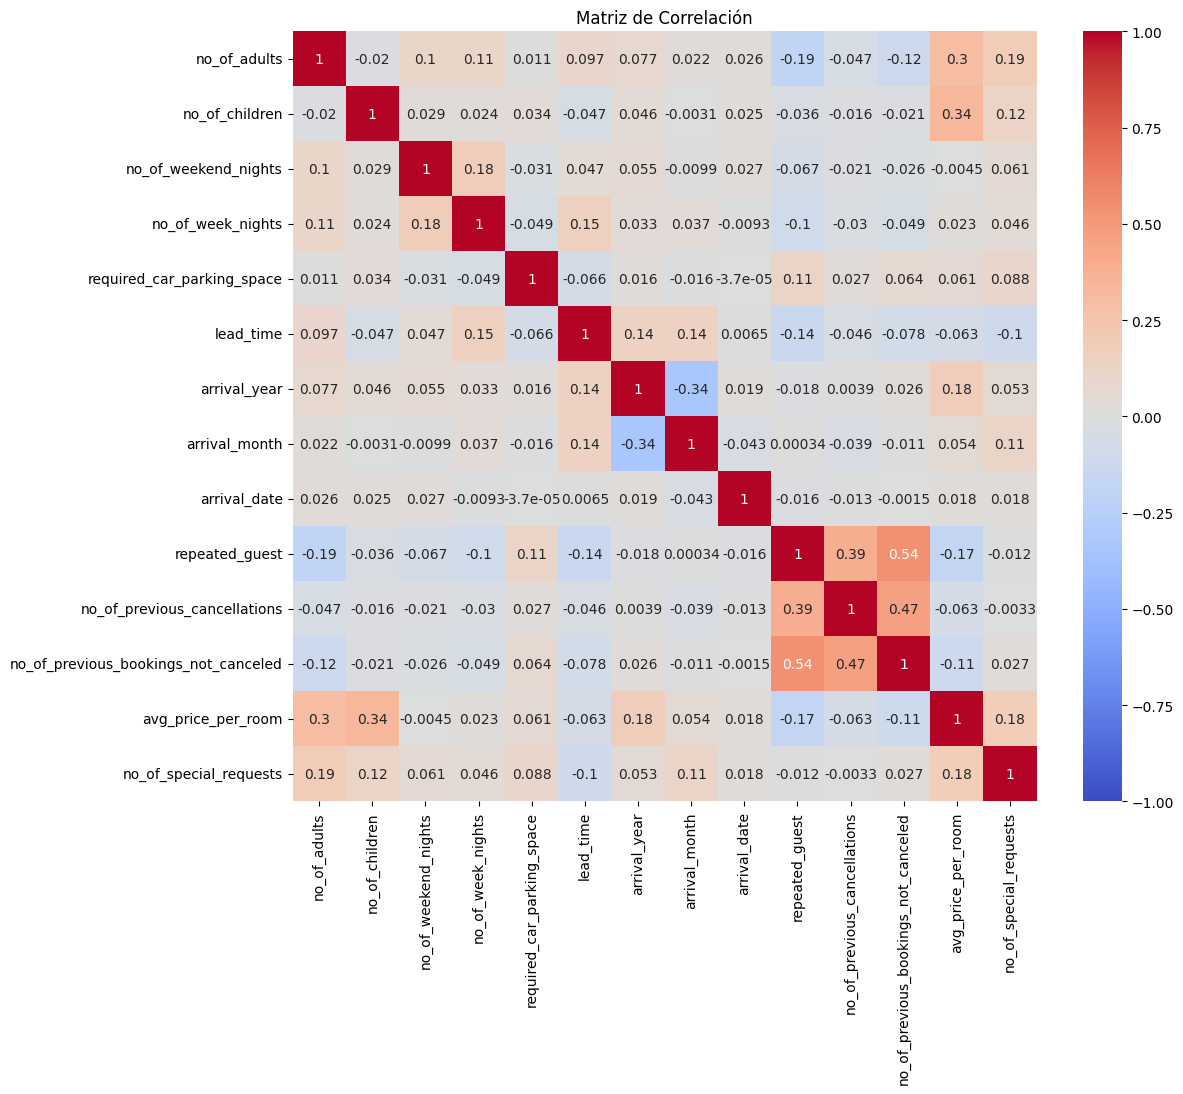

In [205]:

# Relación entre Variables Numéricas

numeric_cols = df.select_dtypes(include=np.number).columns
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()



### Correlaciones positivas

* total_guests y avg_price_per_room (+0.445906): 

Cuanto más huéspedes, mayor precio promedio por habitación.
* arrival_year y avg_price_per_room (+0.178605): 

Dependiendo del año, los precios pueden variar.
* repeated_guest y no_of_previous_bookings_not_canceled (+0.539156): 
 
Clientes recurrentes suelen haber tenido reservas anteriores sin cancelar.
* lead_time y arrival_year (+0.143439): 

Mayor anticipación de reserva tiende a variar según el año.


### Correlaciones negativas

* repeated_guest y avg_price_per_room (-0.174900): 

Los huéspedes recurrentes pueden pagar menos por habitación.
* no_of_previous_bookings_not_canceled y avg_price_per_room (-0.113684): 

Más reservas previas no canceladas pueden estar asociadas a precios más bajos.


In [206]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

correlaciones = {
    "Total de Huéspedes vs Precio Promedio Habitación": 0.45,
    "Año de Llegada vs Precio Promedio Habitación": 0.18,
    "Huésped Recurrente vs Reservas Previas No Canceladas": 0.53,
    "Tiempo de Anticipación vs Año de Llegada": 0.14,
    "Huésped Recurrente vs Precio Promedio Habitación": -0.17,
    "Reservas Previas No Canceladas vs Precio Promedio Habitación": -0.11
}



C:\Users\JUAN\AppData\Local\Temp\ipykernel_15076\1028723602.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coeficiente", y="Relación", data=df_corr, palette="coolwarm", edgecolor="black")


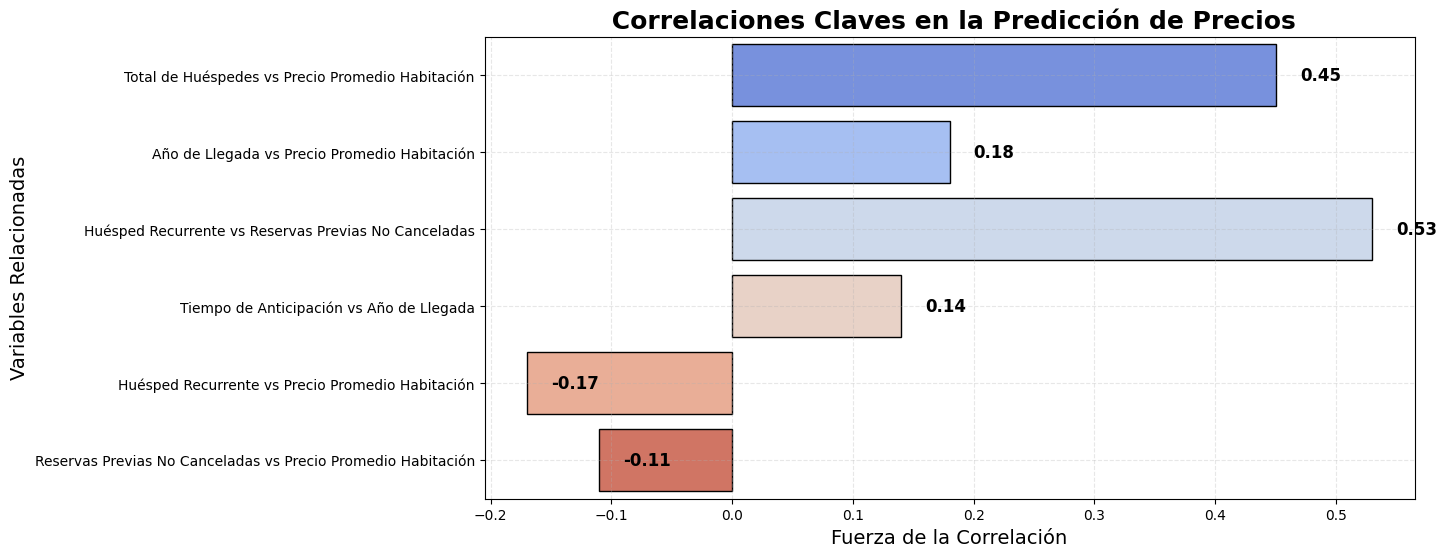

In [207]:
df_corr = pd.DataFrame(list(correlaciones.items()), columns=["Relación", "Coeficiente"])

plt.figure(figsize=(12, 6))
sns.barplot(x="Coeficiente", y="Relación", data=df_corr, palette="coolwarm", edgecolor="black")
plt.title(" Correlaciones Claves en la Predicción de Precios", fontsize=18, fontweight="bold")
plt.xlabel("Fuerza de la Correlación", fontsize=14)
plt.ylabel("Variables Relacionadas", fontsize=14)
plt.grid(alpha=0.3, linestyle="--")
for index, value in enumerate(df_corr["Coeficiente"]):
    plt.text(value + 0.02, index, f"{value:.2f}", fontsize=12, fontweight="bold", verticalalignment="center")

plt.show()

In [208]:
print(df.columns)

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')


#### Limpieza de Datos

In [209]:
# Imputo valores faltantes 
print("Valores faltantes por columna:")
df.isnull().sum()



Valores faltantes por columna:


Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [210]:
# Borramos Duplicados
print("\nNúmero de filas duplicadas:", df.duplicated().sum())
df.drop_duplicates(inplace=True)




Número de filas duplicadas: 0


In [211]:
# Eliminamos columnas inútiles 
df.drop(columns=['Booking_ID'], inplace=True)

### outlies

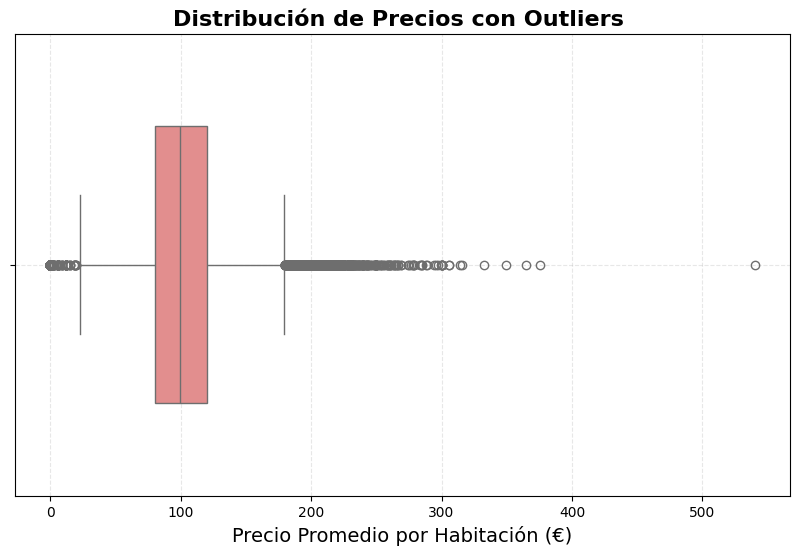

In [214]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Boxplot para visualizar los outliers
sns.boxplot(x=df["avg_price_per_room"], color="lightcoral", width=0.6)

# Mejorar diseño visual
plt.title("Distribución de Precios con Outliers ", fontsize=16, fontweight="bold")
plt.xlabel("Precio Promedio por Habitación (€)", fontsize=14)
plt.grid(alpha=0.3, linestyle="--")

plt.show()

In [219]:
#calculo el IQR para detectar outliers en 'avg_price_per_room'
Q1, Q3 = df["avg_price_per_room"].quantile([0.25, 0.75])
IQR = Q3 - Q1  
print(f"Primer cuartil (Q1): {Q1:.2f} €")
print(f"Tercer cuartil (Q3): {Q3:.2f} €")



Primer cuartil (Q1): 80.30 €
Tercer cuartil (Q3): 120.00 €


In [259]:
# Establezco los límites para detectar outliers
limite_inferior = Q1 - 1 * IQR
limite_superior = Q3 + 2 * IQR

print(f"IQR (Rango Intercuartílico): {IQR:.2f} €")
print(f"Límites para detectar outliers: {limite_inferior:.2f} € - {limite_superior:.2f} €")

IQR (Rango Intercuartílico): 39.70 €
Límites para detectar outliers: 40.60 € - 199.40 €


In [260]:
# filtro el DataFrame para quedarme solo con los precios que están dentro de estos límites
df_sin_outliers = df[(df["avg_price_per_room"] >= limite_inferior) & (df["avg_price_per_room"] <= limite_superior)]

# filtro los precios que son demasiado bajos.
umbral_minimo = df_sin_outliers["avg_price_per_room"].quantile(0.05)
print(f"Umbral mínimo (percentil 5): {umbral_minimo:.2f} €")
df_sin_outliers = df_sin_outliers[df_sin_outliers["avg_price_per_room"] > umbral_minimo]

Umbral mínimo (percentil 5): 65.00 €


In [261]:
# Aplico una transformación logarítmica a los precios
df_sin_outliers["avg_price_per_room_log"] = np.log1p(df_sin_outliers["avg_price_per_room"])
print(f"He eliminado {len(df) - len(df_sin_outliers)} registros.")

He eliminado 3685 registros.


C:\Users\JUAN\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\JUAN\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


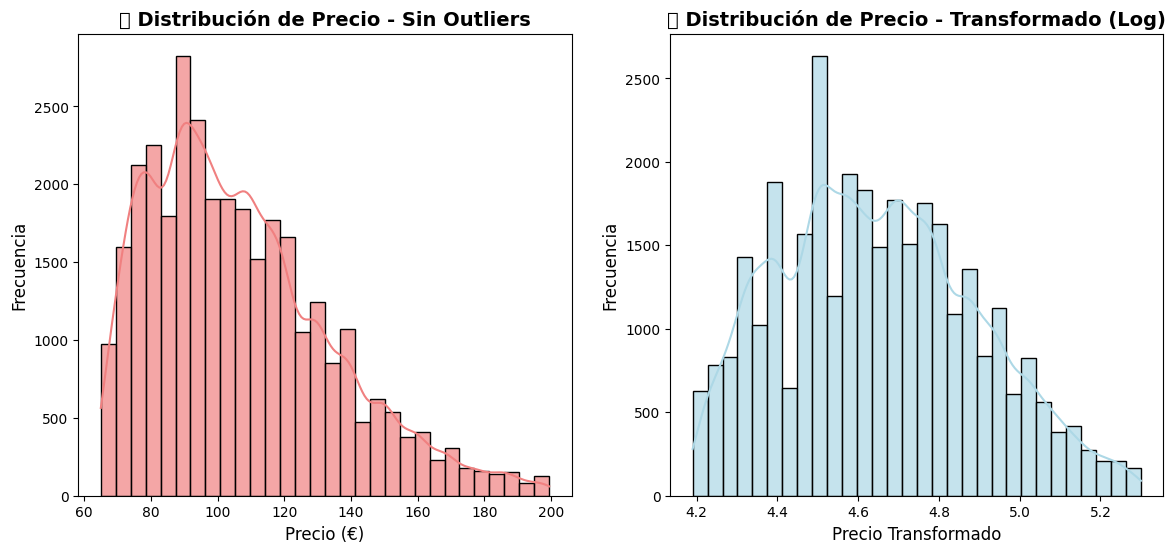

In [262]:

# Grafico distribución de precios (antes y después)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(df_sin_outliers["avg_price_per_room"], bins=30, kde=True, color="lightcoral", alpha=0.7, ax=axes[0])
axes[0].set_title("📌 Distribución de Precio - Sin Outliers", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Precio (€)", fontsize=12)
axes[0].set_ylabel("Frecuencia", fontsize=12)

sns.histplot(df_sin_outliers["avg_price_per_room_log"], bins=30, kde=True, color="lightblue", alpha=0.7, ax=axes[1])
axes[1].set_title("✅ Distribución de Precio - Transformado (Log)", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Precio Transformado", fontsize=12)
axes[1].set_ylabel("Frecuencia", fontsize=12)

plt.show()

### Feature Engineering

#### Codificación de Variables Categóricas

In [265]:
# Hago get_dummies para codificar las variables categoricas con las que queremos trabajar

df = pd.get_dummies(df, columns=['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status'], drop_first=True)

In [266]:
print(df.columns)

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests',
       'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3',
       'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4',
       'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6',
       'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary',
       'market_segment_type_Corporate', 'market_segment_type_Offline',
       'market_segment_type_Online', 'booking_status_Not_Canceled'],
      dtype='object')


##### Creación de Nuevas Características

In [267]:
# Creamos total_guests y total_nights
df['total_guests'] = df['no_of_adults'] + df['no_of_children']

df['total_nights'] = df['no_of_weekend_nights'] + df['no_of_week_nights']



In [268]:
# Eliminamos las columnas originales si ya no son necesarias
df.drop(columns=['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights'], inplace=True)

* avg_price_per_room tiene una correlación moderada con total_guests (+0.445906) 

(A más huéspedes, mayor precio promedio por habitación.)

* lead_time tiene correlación positiva con arrival_year (+0.143439) 

(Reservas con mayor anticipación tienden a variar según el año.)

* no_of_previous_bookings_not_canceled y repeated_guest (+0.539156)

(Los huéspedes que han reservado antes sin cancelar suelen ser clientes recurrentes.)

* arrival_year y arrival_month (-0.339689)

(Hay una tendencia de variación mensual en la ocupación dependiendo del año.)


In [269]:
df.to_csv(r'C:\Users\JUAN\Desktop\BOOTCAMP - DATA SCIENCE\Ejercicios Juan\Optimus_Price_proyecto_final_ML\data\processed\hotel_reservations_clean.csv', index = False)